## Let's start by importing the needed libraries to use DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

##### We can set up the standard data visualisaton params for Jupyter like this

In [2]:
from pylab import rcParams
import seaborn as sb

In [3]:
%matplotlib inline

# Change these variables to change the width and height of the figures
f_width = 15
f_height = 8

rcParams['figure.figsize'] = f_width, f_height

sb.set_style('whitegrid')

## For the dataset we will use a multidimentional numpy array (with [x,y] values)

In [4]:
import numpy as np
X = np.array([
    [1, 2], 
    [2, 2], 
    [2, 3], 
    [8, 17], 
    [8, 18], 
    [11, 2], 
    [12, 2], 
    [12, 3], 
    [18, 7], 
    [38, 18], 
    [31, 12], 
    [32, 12], 
    [32, 13], 
    [38, 17], 
    [38, 18], 
    [38, 18], 
    [31, 12], 
    [32, 12], 
    [32, 13], 
    [38, 17], 
    [38, 18], 
    [40, 83], 
    [45, 85], 
    [50, 84], 
    [55, 82], 
    [60, 84], 
    [65, 86], 
    [70, 85], 
    [75, 83]
])

### Let's start by creating and fitting the model

Here we're providing the 2 most important parameters for the DBSCAN (they are however NOT required)
- **eps** (the minimum distance between datapoints for them to be clustered together)
- **min_samples** (the minimum amount of datapoints to be considered a cluster, if this is 1.. everything will be a cluster)

In [5]:
db = DBSCAN(eps=4, min_samples=2).fit(X)

##### After that, we can get the index of core samples as booleans (True for clustered datapoints, False for outliers)

In [6]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

##### Below you can see a comparison of data and the clustering (the first 9 datapoints)

In [7]:
print('1. The dataset\n', X[:9])
print('2. The clustered labels\n', labels[:9])
print('3. The index of core samples as booleans\n', core_samples_mask[:9])

1. The dataset
 [[ 1  2]
 [ 2  2]
 [ 2  3]
 [ 8 17]
 [ 8 18]
 [11  2]
 [12  2]
 [12  3]
 [18  7]]
2. The clustered labels
 [ 0  0  0  1  1  2  2  2 -1]
3. The index of core samples as booleans
 [ True  True  True  True  True  True  True  True False]


Remember we've set an eps (distance for clustering) of 4, so every datapoint that is within a distance of 4 from another datapoint is going to be clustered together.

If you look at the data above you can see that the (2.) clustered labels says there are 3 clusters and one outlier. The outliers will all get a label of -1 by default. If we look at the dataset we can see that the outlier is [18, 7], which makes sense because it's more than 4 away from [12, 3] (that's a distance of 16)

In the (3.) The index of core samples as booleans you can not see the clusters anymore, only the outliers of the data (this will be used later to color the clusters and outliers in a graph.

### Let's create a function for plotting a graph with the data we have, we can use this function again later with different data

In [8]:
import matplotlib.pyplot as plt
def plot(X, labels, core_samples_mask):
    
    # calculate the number of clusters and outliers
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers_ = list(labels).count(-1)

    # Black removed and is used for outliers instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for outliers.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d     Estimated number of outliers: %d' % (n_clusters_, n_outliers_))
    return plt

### Plot result

We looked at the clusters that should be generated with the first 9 datapoints, the last one should be an outlier. The others should be divided into 3 clusters. If we plot the results we can verify that this is the result we want

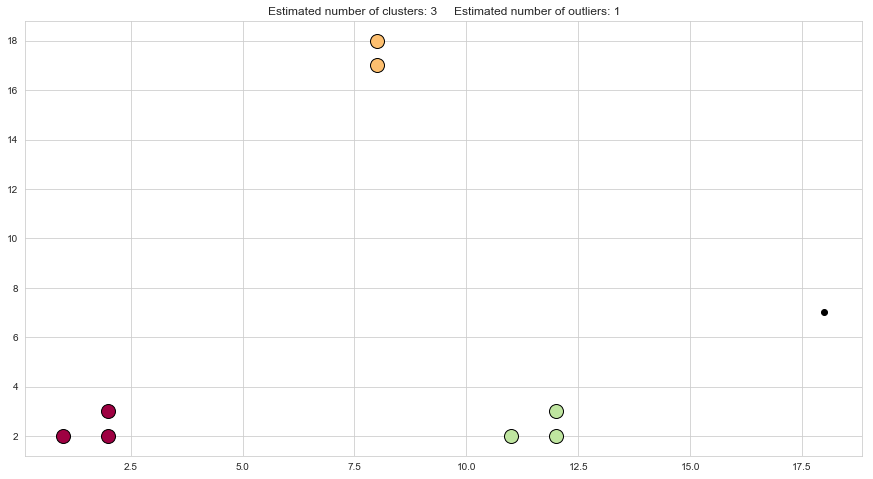

In [9]:
plt = plot(X[:9], labels[:9], core_samples_mask[:9])
plt.show()

##### Let's see what we'll get when we plot all of the data

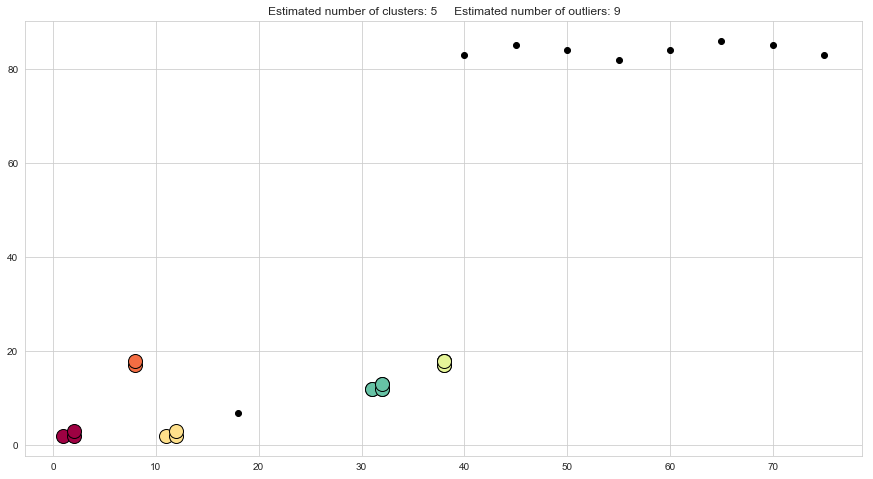

In [10]:
plt = plot(X, labels, core_samples_mask)
plt.show()

As you can see, with a distance of 4. The datapoints in the top right will not be clustered together because the distance between them is somewhere between 5 and 6. Lets see what will happen when we change the eps.

# Changing the eps

##### Let's fit the model again, but this tim e with an eps of 6 (still a minimum of 2 datapoints for it to be a cluster).

In [11]:
db = DBSCAN(eps=6, min_samples=2).fit(X)

##### get the index of core samples as booleans again

In [12]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

##### plot the result

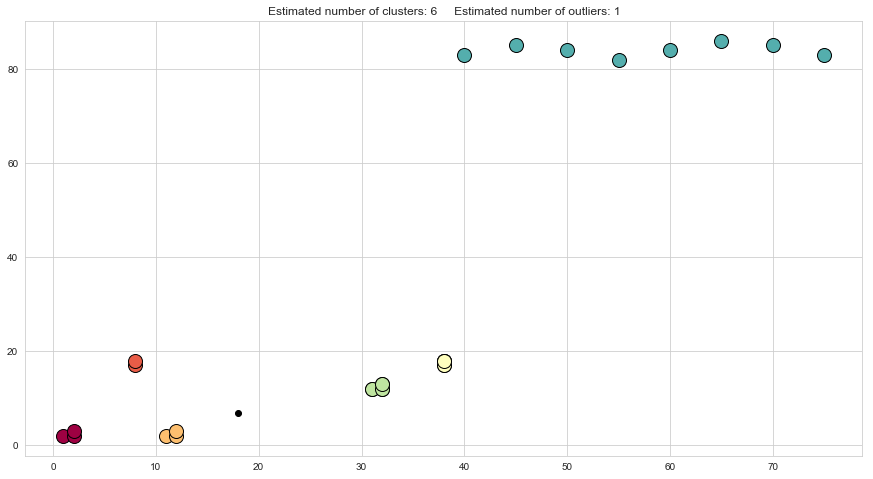

In [13]:
plt = plot(X, labels, core_samples_mask)
plt.show()

As you can see the algorithm detected one more cluster and only one outlier remains. All of the datapoints in the top left have been clustered together, this is because they are all less than 6 away from the next one. But if you compare the first and the last, you can see that they are 35 away from eachother.

If this is the result that you need, DBSCAN is the perfect algorithm for you. If it's not the result that you're looking for, you can tweak the algorithm by changing some parameters on the DBSCAN. Or choose another algorithm that suits your need.

## Here is a brief overview of what parameters can be given, and what they do.

##### eps : float, optional
The maximum distance between two samples for them to be considered as in the same neighborhood.

##### min_samples : int, optional
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

##### metric : string, or callable
The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse matrix, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.

##### metric_params : dict, optional
Additional keyword arguments for the metric function.

New in version 0.19.

##### algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional
The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

##### leaf_size : int, optional (default = 30)
Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

##### p : float, optional
The power of the Minkowski metric to be used to calculate distance between points.

##### n_jobs : int or None, optional (default=None)
The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

For more information, take a look at the documentation here:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

### These are the default parameters for DBSCAN when noarguments are provided:

In [14]:
db = DBSCAN(
    eps=0.5, 
    min_samples=5, 
    metric='euclidean', 
    metric_params=None, 
    algorithm='auto', 
    leaf_size=30, 
    p=None, 
    n_jobs=None
)

# Changing the metric

##### Let's fit the model again, but this time with an eps of 6 AND a manhatten metric

In [15]:
db = DBSCAN(eps=6, min_samples=2, metric='manhattan').fit(X)

##### get the index of core samples as booleans again

In [16]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

##### plot the result

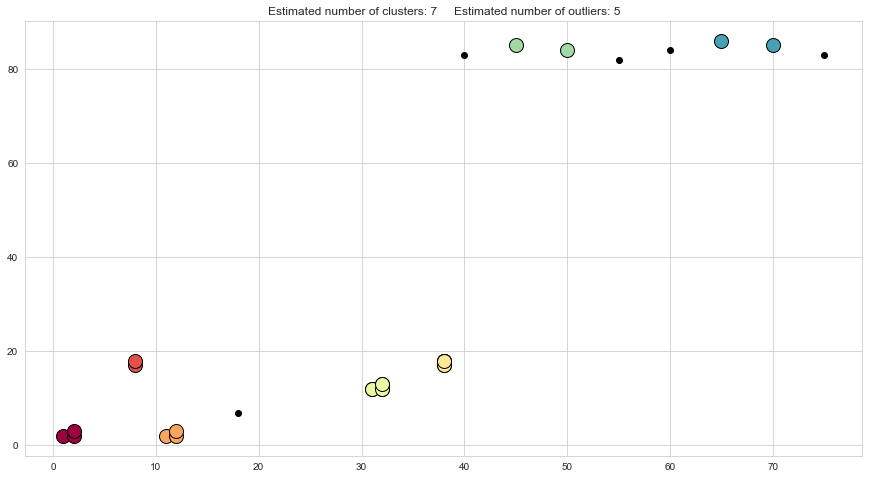

In [17]:
plt = plot(X, labels, core_samples_mask)
plt.show()

### Why does it cluster diffrent with manhattan distance instead of euclidean distance?

##### let's find out

The manhattan distance doesn't look at individual datapoints to see what's close together. It looks at the center point of a cluster and calculates the distance (eps) from there.

Let's plot these center points to better understand what's going on.

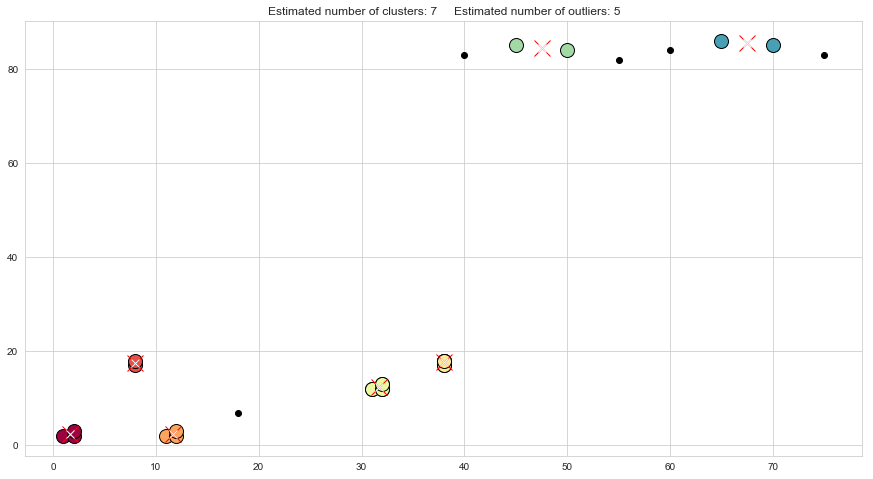

In [18]:
# get the plotted datapoints
plt = plot(X, labels, core_samples_mask)

# Find the center of each cluster
clusters = {}
for l in set(labels):
    if not l == -1:
        clusters[l] = {
            'count': 0,
            'x_total': 0,
            'y_total': 0
        }
for idx, l in enumerate(labels):
    if not l == -1:
        clusters[l]['count'] += 1
        clusters[l]['x_total'] += X[idx][0]
        clusters[l]['y_total'] += X[idx][1]

for l in set(labels):
    if not l == -1:
        x = clusters[l]['x_total'] / clusters[l]['count']
        y = clusters[l]['y_total'] / clusters[l]['count']
        
        # plot a marker at each center of the cluster
        plt.plot(x, y, marker='x', color='red', markersize=16)
        plt.plot(x, y, marker='x', color='white', markersize=8)
plt.show()

All of the X marks are the centers of the different clusters, since the eps is still 6, the datapoints more than 6 away from the center will not be clustered together.

# ~ Thats all folks ~